In [1]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
from wordcloud import WordCloud
import warnings 
import os
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
df=pd.read_csv("template.csv")
df

,ID,tweet,label,probability


In [3]:
path = 'training/'

for filename in os.listdir(path):
    print(filename)
    df2=pd.read_csv(path+filename,sep="\t",skiprows=-1,names=["ID","tweet","label","probability"])
    df2=df2[df2["probability"]>.50]
    df=df.append(df2)

anger-ratings-0to1.dev.gold.txt
anger-ratings-0to1.train.txt
fear-ratings-0to1.dev.gold.txt
fear.txt.csv
joy-ratings-0to1.dev.gold.txt
joy-ratings-0to1.train.txt
sadness-ratings-0to1.dev.gold.txt
sadness-ratings-0to1.train.txt


In [4]:
testdf=pd.read_csv("template.csv")

In [5]:
path = 'testing/'

for filename in os.listdir(path):
    print(filename)
    df2=pd.read_csv(path+filename,sep="\t",skiprows=-1,names=["ID","tweet","label","probability"])
    df2=df2[df2["probability"]>.50]
    testdf=testdf.append(df2)

anger-ratings-0to1.test.gold.txt
fear-ratings-0to1.test.gold.txt
joy-ratings-0to1.test.gold.txt
sadness-ratings-0to1.test.gold.txt


In [6]:
testdf=testdf.reset_index()
testdf.head()
testdf=testdf[["tweet","label","probability"]]
df["label"].unique()

array(['anger', 'fear', 'joy', 'sadness'], dtype=object)

In [7]:
df=df.reset_index()
df=df[["tweet","label","probability"]]
df.head()
df["label"].unique()

array(['anger', 'fear', 'joy', 'sadness'], dtype=object)

In [8]:
print(len(df))
print(len(testdf))

1790
1505


## Data Cleaning

In [9]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    

In [10]:
#remove twitter handles
df['tidy_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*") 
df.head()

,tweet,label,probability,tidy_tweet
0,@IllinoisLoyalty that Rutgers game was an abom...,anger,0.562,that Rutgers game was an abomination. An affr...
1,Sometimes I get mad over something so minuscul...,anger,0.708,Sometimes I get mad over something so minuscul...
2,Sometimes I get mad over something so minuscul...,anger,0.646,Sometimes I get mad over something so minuscul...
3,My eyes have been dilated. I hate the world ri...,anger,0.812,My eyes have been dilated. I hate the world ri...
4,@huwellwell One chosen by the CLP members! MP ...,anger,0.682,One chosen by the CLP members! MP seats are n...


In [11]:
#remove twitter handles
testdf['tidy_tweet'] = np.vectorize(remove_pattern)(testdf['tweet'], "@[\w]*") 
testdf.head()

,tweet,label,probability,tidy_tweet
0,This game has pissed me off more than any othe...,anger,0.898,This game has pissed me off more than any othe...
1,@moocowward @mrsajhargreaves @Melly77 @GaryBar...,anger,0.646,if he can't come to my Mum'a 60th after 25...
2,@moocowward @mrsajhargreaves @Melly77 @GaryBar...,anger,0.583,if he can't come to my Mum'a 60th after 25...
3,@virginmedia I've been disconnected whilst on ...,anger,0.625,I've been disconnected whilst on holiday 😤 bu...
4,@eMilsOnWheels I'm furious 😩😩😩,anger,0.708,I'm furious 😩😩😩


In [12]:
# remove special characters, numbers, punctuations
df['tidy_tweet'] = df['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
# remove special characters, numbers, punctuations
testdf['tidy_tweet'] = testdf['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

In [13]:
tokenized_tweet = df['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()
tokenized_tweet_test = testdf['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet_test.head()

0    [This, game, has, pissed, me, off, more, than,...
1    [if, he, can, t, come, to, my, Mum, a, th, aft...
2    [if, he, can, t, come, to, my, Mum, a, th, aft...
3    [I, ve, been, disconnected, whilst, on, holida...
4                                      [I, m, furious]
Name: tidy_tweet, dtype: object

In [14]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

tokenized_tweet_test = tokenized_tweet_test.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

tokenized_tweet_test.head()

0    [thi, game, ha, piss, me, off, more, than, ani...
1    [if, he, can, t, come, to, my, mum, a, th, aft...
2    [if, he, can, t, come, to, my, mum, a, th, aft...
3    [I, ve, been, disconnect, whilst, on, holiday,...
4                                       [I, m, furiou]
Name: tidy_tweet, dtype: object

In [15]:
for i in tokenized_tweet.keys():
    tokenized_tweet[i]=' '.join(tokenized_tweet[i])

df['tidy_tweet'] = tokenized_tweet
df.head()

for i in tokenized_tweet_test.keys():
    tokenized_tweet_test[i]=' '.join(tokenized_tweet_test[i])

testdf['tidy_tweet'] = tokenized_tweet_test
testdf.head()

,tweet,label,probability,tidy_tweet
0,This game has pissed me off more than any othe...,anger,0.898,thi game ha piss me off more than ani other ga...
1,@moocowward @mrsajhargreaves @Melly77 @GaryBar...,anger,0.646,if he can t come to my mum a th after k tweet ...
2,@moocowward @mrsajhargreaves @Melly77 @GaryBar...,anger,0.583,if he can t come to my mum a th after k tweet ...
3,@virginmedia I've been disconnected whilst on ...,anger,0.625,I ve been disconnect whilst on holiday but I d...
4,@eMilsOnWheels I'm furious 😩😩😩,anger,0.708,I m furiou


In [16]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90,min_df=2, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(df['tidy_tweet'])
len(bow_vectorizer.get_feature_names())

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90,min_df=2,stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(df['tidy_tweet'])
len(tfidf_vectorizer.get_feature_names())

# Fit the CountVectorizer to the training data specifiying a minimum 
# document frequency of 5 and extracting 1-grams and 2-grams
n_gram_vectorizer = CountVectorizer(max_df=0.90,min_df=2,ngram_range=(1,5))

n_gram = n_gram_vectorizer.fit_transform(df['tidy_tweet'])

len(n_gram_vectorizer.get_feature_names())

13381

In [17]:
test_bow = bow_vectorizer.transform(df['tidy_tweet'])

test_tfidf = tfidf_vectorizer.transform(df['tidy_tweet'])

test_n_gram = n_gram_vectorizer.transform(testdf['tidy_tweet'])

len(n_gram_vectorizer.get_feature_names())

13381

In [18]:
X_train=n_gram
y_train=df[["label"]]
X_test=test_n_gram
y_test=testdf[["label"]]

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score,roc_auc_score


lreg = LogisticRegression(C=1e5, solver='newton-cg', multi_class='ovr')
lreg.fit(X_train, y_train) # training the model

prediction = lreg.predict(X_test) # predicting on the validation set

#print(roc_auc_score(y_test, prediction_int)) # calculating f1 score
print(accuracy_score(y_test,prediction))

C:\Program Files\Python36\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7973421926910299


In [20]:
from sklearn.neural_network import MLPClassifier
clf = clf = MLPClassifier(alpha=1e-5,hidden_layer_sizes=(150,150,150), random_state=1)
clf.fit(X_train,y_train)
prediction = clf.predict(X_test) # predicting on the validation set

#print(roc_auc_score(y_test, prediction_int)) # calculating f1 score
print(accuracy_score(y_test,prediction))

C:\Program Files\Python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7554817275747508


In [21]:
sample_tweet="Do not be afraid."
sample_tweet=remove_pattern(sample_tweet, "@[\w]*") 
sample_tweet=sample_tweet.replace("[^a-zA-Z#]", " ")
tokenized_input=stemmer.stem(sample_tweet)

lreg.predict(n_gram_vectorizer.transform([tokenized_input]))


array(['fear'], dtype=object)

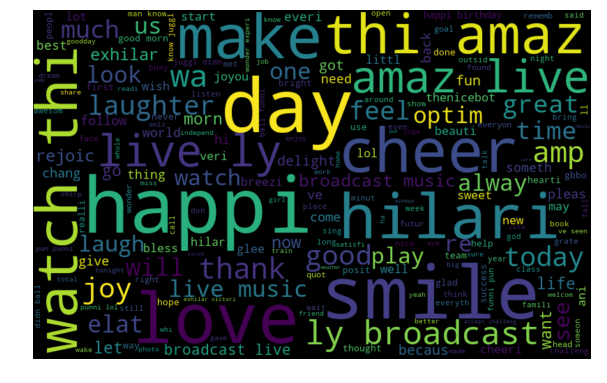

In [22]:
normal_words =' '.join([text for text in df['tidy_tweet'][df['label'] == "joy"]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

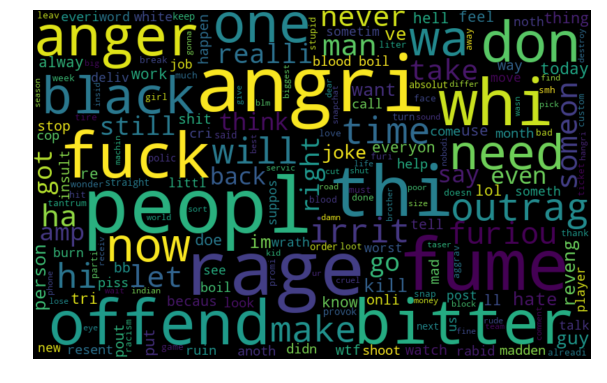

In [23]:
normal_words =' '.join([text for text in df['tidy_tweet'][df['label'] == "anger"]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

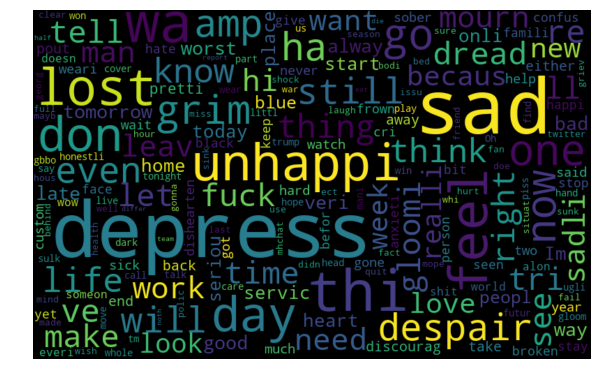

In [24]:
normal_words =' '.join([text for text in df['tidy_tweet'][df['label'] == "sadness"]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

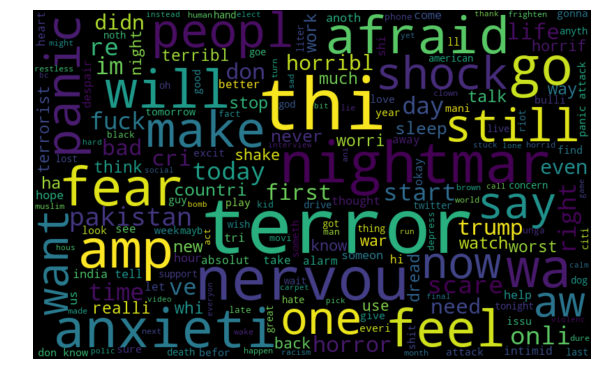

In [25]:
normal_words =' '.join([text for text in df['tidy_tweet'][df['label'] == "fear"]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()